<a href="https://colab.research.google.com/github/pavlosapostolatos/Data-Structures/blob/master/DataMining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Στοιχεία φοιτητών

**Συμμετέχοντες:** \
ΤΥΠΑΛΔΟΣ-ΠΑΥΛΟΣ ΑΠΟΣΤΟΛΑΤΟΣ 1115201800009

ΝΙΚΟΛΑΟΣ ΠΑΣΣΑΚΟΣ ΧΑΤΖΗΟΡΙΔΗΣ 1115201800156

# Initialisation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from gensim.parsing.preprocessing import remove_stopwords
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/DataMining/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
true_frame = pd.read_csv(path + "True.csv")
fake_frame = pd.read_csv(path + "Fake.csv")

# Προεπεξεργασία δεδομένων

In [ ]:
for i in range(len(true_frame)):
  for j in range(2):#title and text
    true_frame.iat[i,j] = true_frame.iat[i,j].lower()
    true_frame.iat[i,j] = re.sub(r'\W', ' ', true_frame.iat[i,j])
    true_frame.iat[i,j] = re.sub(r'\s+', ' ', true_frame.iat[i,j])
for i in range(len(fake_frame)):
  for j in range(2):
    fake_frame.iat[i,j] = fake_frame.iat[i,j].lower()
    fake_frame.iat[i,j] = re.sub(r'\W', ' ', fake_frame.iat[i,j])
    fake_frame.iat[i,j] = re.sub(r'\s+', ' ', fake_frame.iat[i,j])


In [ ]:
true_frame = true_frame.drop(true_frame[true_frame.text.str.len() < 2].index)
fake_frame = fake_frame.drop(fake_frame[fake_frame.text.str.len() < 2].index)

# Οπτικοποίηση Δεδομένων

In [ ]:
print("True News Examples:")
pd.DataFrame(true_frame['title']).head(10)

True News Examples:


,title
0,as u s budget fight looms republicans flip the...
1,u s military to accept transgender recruits on...
2,senior u s republican senator let mr mueller d...
3,fbi russia probe helped by australian diplomat...
4,trump wants postal service to charge much more...
5,white house congress prepare for talks on spen...
6,trump says russia probe will be fair but timel...
7,factbox trump on twitter dec 29 approval ratin...
8,trump on twitter dec 28 global warming
9,alabama official to certify senator elect jone...


In [ ]:
print("Fake News Examples:")
pd.DataFrame(fake_frame['title']).head(10)

Fake News Examples:


,title
0,donald trump sends out embarrassing new year ...
1,drunk bragging trump staffer started russian ...
2,sheriff david clarke becomes an internet joke...
3,trump is so obsessed he even has obama s name...
4,pope francis just called out donald trump dur...
5,racist alabama cops brutalize black boy while...
6,fresh off the golf course trump lashes out at...
7,trump said some insanely racist stuff inside ...
8,former cia director slams trump over un bully...
9,watch brand new pro trump ad features so much...


# Μέσος όρος χαρακτήρων

## Titles

In [ ]:
count_frame = pd.DataFrame(columns=['News Title', 'Median of characters'])
true_title_med = int(true_frame.title.str.len().median())
fake_title_med = int(fake_frame.title.str.len().median())
count_frame.loc[0] = ["True", true_title_med]
count_frame.loc[1] = ["Fake", fake_title_med]
count_frame

,News Title,Median of characters
0,True,63
1,Fake,88


## Text

In [ ]:
count_frame = pd.DataFrame(columns=['News Text', 'Median of characters'])
true_text_med = int(true_frame.text.str.len().median())
fake_text_med = int(fake_frame.text.str.len().median())
count_frame.loc[0] = ["True", true_text_med]
count_frame.loc[1] = ["Fake", fake_text_med]
count_frame

,News Text,Median of characters
0,True,2168
1,Fake,2149


## Διαγράμματα

### Titles

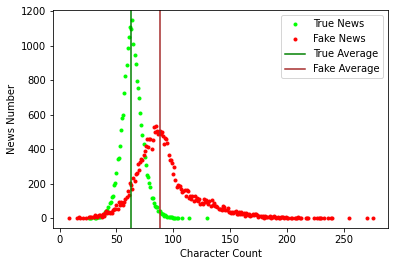

In [ ]:
s = true_frame.title.groupby(true_frame.title.str.len()).count()
x = list(s.index)
y = list(true_frame.title.groupby(true_frame.title.str.len()).count())
plt.plot(x,y, '.', color="lime", label = "True News")

s = fake_frame.title.groupby(fake_frame.title.str.len()).count()
x = list(s.index)
y = list(fake_frame.title.groupby(fake_frame.title.str.len()).count())
plt.plot(x,y, ".", color="red", label = "Fake News")

plt.ylabel("News Number")
plt.xlabel("Character Count")
plt.axvline(true_title_med, 0, 1, color="green", label="True Average")
plt.axvline(fake_title_med, 0, 1, color="brown", label="Fake Average")
plt.legend(loc="upper right")
plt.show()
print()

### Text

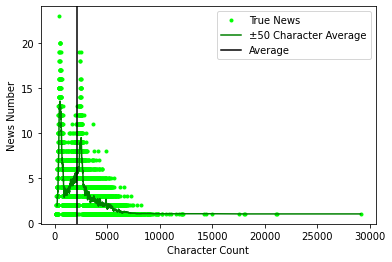

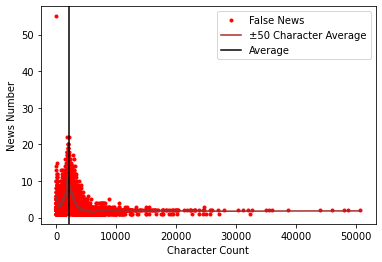

In [ ]:
s = true_frame.text.groupby(true_frame.text.str.len()).count()
x = list(s.index)
y = list(true_frame.text.groupby(true_frame.text.str.len()).count())
rolling_mean = s.rolling(window=50).mean()

plt.plot(x,y, ".", color="lime", label='True News')
plt.plot(x,rolling_mean, color="green", label='±50 Character Average')
plt.axvline(true_text_med, 0, 1, color="black", label="Average")
plt.ylabel("News Number")
plt.xlabel("Character Count")
plt.legend(loc='upper right')
plt.show()
print()

s = fake_frame.text.groupby(fake_frame.text.str.len()).count()
x = list(s.index)
y = list(fake_frame.text.groupby(fake_frame.text.str.len()).count())
rolling_mean = s.rolling(window=50).mean()

plt.plot(x,y, ".", color="red", label='False News')
plt.plot(x,rolling_mean, color="brown", label='±50 Character Average')
plt.axvline(fake_text_med, 0, 1, color="black", label="Average")
plt.ylabel("News Number")
plt.xlabel("Character Count")
plt.legend(loc='upper right')
plt.show()
print()

## Αφαίρεση stopwords

In [ ]:
s_true_frame = true_frame.copy()
s_fake_frame = fake_frame.copy()
for i in range(len(true_frame)):
  for j in range(2):#title and text
    s_true_frame.iat[i,j] = remove_stopwords(true_frame.iat[i,j])
for i in range(len(fake_frame)):
  for j in range(2):
    s_fake_frame.iat[i,j] = remove_stopwords(fake_frame.iat[i,j])

## Titles μέτα την αφαίρεση stopwords

In [ ]:
count_frame = pd.DataFrame(columns=['News Title', 'Median of characters'])
s_true_title_med = int(s_true_frame.title.str.len().median())
s_fake_title_med = int(s_fake_frame.title.str.len().median())
count_frame.loc[0] = ["True", s_true_title_med]
count_frame.loc[1] = ["Fake", s_fake_title_med]
count_frame

,News Title,Median of characters
0,True,55
1,Fake,69


## Text μετά την αφαίρεση stopwords

In [ ]:
count_frame = pd.DataFrame(columns=['News Text', 'Median of characters'])
s_true_text_med = int(true_frame.text.str.len().median())
s_fake_text_med = int(fake_frame.text.str.len().median())
count_frame.loc[0] = ["True", s_true_text_med]
count_frame.loc[1] = ["Fake", s_fake_text_med]
count_frame

,News Text,Median of characters
0,True,2168
1,Fake,2149


## Διαγράμματα μετά την αφαίρεση stopwords

### Titles

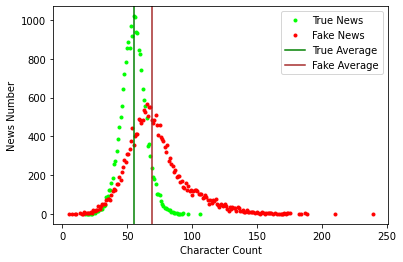

In [ ]:
s = s_true_frame.title.groupby(s_true_frame.title.str.len()).count()
x = list(s.index)
y = list(s_true_frame.title.groupby(s_true_frame.title.str.len()).count())
plt.plot(x,y, '.', color="lime", label = "True News")

s = s_fake_frame.title.groupby(s_fake_frame.title.str.len()).count()
x = list(s.index)
y = list(s_fake_frame.title.groupby(s_fake_frame.title.str.len()).count())
plt.plot(x,y, ".", color="red", label = "Fake News")

plt.ylabel("News Number")
plt.xlabel("Character Count")
plt.axvline(s_true_title_med, 0, 1, color="green", label="True Average")
plt.axvline(s_fake_title_med, 0, 1, color="brown", label="Fake Average")
plt.legend(loc="upper right")
plt.show()
print()

### Text

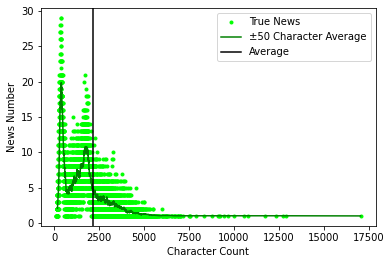

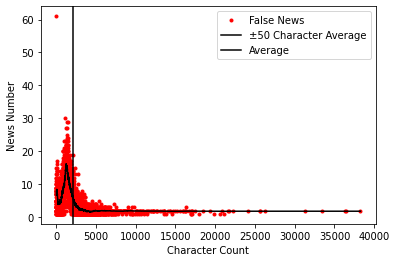

In [ ]:
s = s_true_frame.text.groupby(s_true_frame.text.str.len()).count()
x = list(s.index)
y = list(s_true_frame.text.groupby(s_true_frame.text.str.len()).count())
rolling_mean = s.rolling(window=50).mean()

plt.plot(x,y, ".", color="lime", label='True News')
plt.plot(x,rolling_mean, color="green", label='±50 Character Average')
plt.axvline(s_true_text_med, 0, 1, color="black", label="Average")
plt.ylabel("News Number")
plt.xlabel("Character Count")
plt.legend(loc='upper right')
plt.show()
print()

s = s_fake_frame.text.groupby(s_fake_frame.text.str.len()).count()
x = list(s.index)
y = list(s_fake_frame.text.groupby(s_fake_frame.text.str.len()).count())
rolling_mean = s.rolling(window=50).mean()

plt.plot(x,y, ".", color="red", label='False News')
plt.plot(x,rolling_mean, color="black", label='±50 Character Average')
plt.axvline(s_fake_text_med, 0, 1, color="black", label="Average")
plt.ylabel("News Number")
plt.xlabel("Character Count")
plt.legend(loc='upper right')
plt.show()
print()

# Most common bigrams

## True News

In [ ]:
print('Top 10 True News bigrams in:')
pt=[]#idio prama alla kai gia BOW kai tf-idf,gia text kai title
for i,model in enumerate([CountVectorizer(ngram_range=(2,2), max_features=10, binary=True),TfidfVectorizer(ngram_range=(2,2), max_features=10)]):
  pt.append(pd.DataFrame(columns=['Title', 'Text']))
  dataset = list(s_true_frame['title'])
  v = model
  v.fit_transform(dataset)
  t1 = v.get_feature_names_out()

  dataset = list(s_true_frame['text'])
  v = model
  v.fit_transform(dataset)
  t2 = v.get_feature_names_out()

  for j in range(len(t1)):
      pt[i].loc[j] = (t1[j],t2[j])
  pt[i].index+=1
  print(pt[i])


Top 10 True News bigrams in:
                   Title                Text
1          islamic state        barack obama
2            north korea        donald trump
3            puerto rico            new york
4             says trump    president barack
5            south korea    president donald
6          supreme court      prime minister
7             travel ban      said statement
8   trump administration       united states
9             trump says  washington reuters
10           white house         white house
                   Title                Text
1          islamic state        donald trump
2            north korea            new york
3            puerto rico         north korea
4             says trump    president donald
5            south korea      prime minister
6          supreme court      said statement
7             travel ban          trump said
8   trump administration       united states
9             trump says  washington reuters
10           white house  

## Fake News

In [ ]:
print('Top 10 fake News bigrams in:')
pf=[]
for i,model in enumerate([CountVectorizer(ngram_range=(2,2), max_features=10, binary=True),TfidfVectorizer(ngram_range=(1,2), max_features=10)]):
  pf.append(pd.DataFrame(columns=['Title', 'Text']))
  dataset = list(s_fake_frame['title'])
  v = model
  v.fit_transform(dataset)
  t1 = v.get_feature_names_out()

  dataset = list(s_fake_frame['text'])
  v = model
  v.fit_transform(dataset)
  t2 = v.get_feature_names_out()

  for j in range(len(t1)):
      pf[i].loc[j] = (t1[j],t2[j])
  pf[i].index+=1
  print(pf[i])


Top 10 fake News bigrams in:
              Title             Text
1        anti trump     donald trump
2    bernie sanders   featured image
3       boiler room     getty images
4      donald trump  hillary clinton
5          fox news         new york
6   hillary clinton      pic twitter
7   president trump  president trump
8          ted cruz      twitter com
9       trump video    united states
10      white house      white house
        Title          Text
1       black       clinton
2    breaking        donald
3     clinton  donald trump
4     hillary          like
5         new          news
6       obama         obama
7   president        people
8       trump     president
9       video          said
10      watch         trump


# ΔΗΜΙΟΥΡΓΙΑ CSV
το προγραμμα κρασαρει στο word2vec αν περαστουν ολοκληρα τα csv στα train k' test. εδω περναμε το 70% των true,false και φτιαχνουμε παραμετρους οπως το max_iter στις συναρτησεις παρακατω ωστε να μην γινεται overflow

αγνοηστε τα warnings

In [ ]:
true_train = true_frame.iloc[:8000, :]#int(len(true_frame)/2)
true_train['label']=1
true_test = true_frame.iloc[8000:16000, :]
true_test['label']=1
fake_train = fake_frame.iloc[:8000, :]#int(len(fake_frame)/2)
fake_train['label']=0
fake_test = fake_frame.iloc[8000:16000, :]
fake_test['label']=0
# print(pd.concat([fake_train,true_train],ignore_index=True))
# print(pd.concat([fake_test,true_test],ignore_index=True))
pd.concat([fake_train,true_train],ignore_index=True).to_csv(path + 'train.csv')
pd.concat([fake_test,true_test],ignore_index=True).to_csv(path + 'test.csv')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

# Classification

In [ ]:
traindf=pd.read_csv(path + 'train.csv')
testdf=pd.read_csv(path + 'test.csv')#to test einai kapoia nan gia kapoio logo
results = []
trainlabel = np.asarray(traindf['label'])#extract true-false label
testlabel=np.asarray(testdf['label'])
for i,vectorizer in enumerate([CountVectorizer(ngram_range=(2,2), max_features=200),TfidfVectorizer(ngram_range=(1,2), max_features=10)]):#ngram_range has varying results
  dataset=traindf.text
  X1 = vectorizer.fit_transform(dataset)
  traindata=X1.toarray() #make a 2d array of with the frequencies of the word ngrams
  means = np.mean(traindata, axis=0)
  stds = np.std(traindata, axis=0)
  traindata = (traindata - means)/stds #optimises the vector
  dataset=testdf.text #same for test
  X1 = vectorizer.transform(dataset)
  testdata=X1.toarray()
  # print(traindata)
  means = np.mean(testdata, axis=0)
  stds = np.std(testdata, axis=0)
  testdata = (testdata - means)/stds #these vectorizer method calculations dont need to be repeated for each clustering algorithm below
  # print(testdata)
  if i==0: print("CountVectorizer")
  elif i==1: print("TfidfVectorizer")
  print("------------------")
  for name, model in zip(["LogisticRegression","GaussianNB","SVC","RandomForestClassifier"],[LogisticRegression(max_iter=200),GaussianNB(),svm.SVC(),RandomForestClassifier( random_state=0)]):
    model.fit(traindata,trainlabel) #execute each clustering method
    accuracy = model.score(testdata, testlabel) # grade how much the content of the test text set,based on the training, corresponds it's true label
    y_pred=model.predict(testdata) # experimentaly predict the label based on our training and compare it to the true label
    print(name)
    print("accuracy = ", accuracy * 100, "%")
    accuracy = model.score(traindata, trainlabel) # grade how much the content of the test text set,based on the training, corresponds it's true label
    print("accuracy on training data = ", accuracy * 100, "%")
    print("f1 score = ", f1_score(testlabel,y_pred) * 100, "%")
    y_pred=model.predict(traindata) # experimentaly predict the label based on our training and compare it to the true label
    print("f1 score on training data = ", f1_score(trainlabel,y_pred) * 100, "%")
    print()
    results.append((accuracy*100,f1_score(testlabel,y_pred) * 100))

CountVectorizer
------------------
LogisticRegression
accuracy =  83.73125 %
accuracy on training data =  99.79375 %
f1 score =  81.81627663290254 %
f1 score on training data =  99.79389169945662 %

GaussianNB
accuracy =  61.275 %
accuracy on training data =  99.05625 %
f1 score =  36.827079934747154 %
f1 score on training data =  99.06158722267105 %

SVC
accuracy =  86.99375 %
accuracy on training data =  99.8625 %
f1 score =  86.93085473842869 %
f1 score on training data =  99.86263736263736 %

RandomForestClassifier
accuracy =  73.74374999999999 %
accuracy on training data =  100.0 %
f1 score =  79.09013986362054 %
f1 score on training data =  100.0 %

TfidfVectorizer
------------------
LogisticRegression
accuracy =  70.2625 %
accuracy on training data =  81.8875 %
f1 score =  70.51679266327923 %
f1 score on training data =  82.02010174959673 %

GaussianNB
accuracy =  67.07499999999999 %
accuracy on training data =  80.40625 %
f1 score =  66.50559511698881 %
f1 score on training dat

πειραματιστηκαμε με αυτα τα c και gamma αλλα δεν βελτιωσαν την ακριβεια μας


In [ ]:
# PROXEIRO
# C_2d_range = [1e-2, 1, 1e2]
# gamma_2d_range = [1e-1, 1, 1e1]
# classifiers = []
# for C in C_2d_range:
#     for gamma in gamma_2d_range:
#         clf = SVC(C=C, gamma=gamma,kernel='linear')
#         clf.fit(X_2d, y_2d)
#         classifiers.append((C, gamma, clf))

# Classification with Word2Vec
εδω κανουμε τα ιδια αλλα για τον 2d array των simililarities επειδη η συναρτηση get_normed_vectors() που μας δινει το smilirity vector των n λεξεων του document δεν υποστηριζεται στο google colab φτιαχνουμε αυτον τον πινακα μονοι μας

το tokens ειναι ολα τα text σε λιστα,το record ενα node της λιστας (text προταση split-αρισμενη) το word ειναι ενα κομματι της split προτασης και για καθε τετοια word περνουμε ενα πινακα καταληγωντας σε εναν 2d array traindata
για n λεξεις

εφοσον τα αποτελεσματα μας με το word2vec εχουν τοσο μεγαλη ακριβεια το παραθετουμε σαν την ασκηση 3 μας(το bonus)
https://stackoverflow.com/questions/49643974/how-to-do-text-classification-using-word2vec

In [ ]:
sentences = pd.concat([traindf.text,testdf.text],ignore_index=True)
nltk.download('punkt')
# simple tokenization
tokens = [nltk.word_tokenize(sentence) for sentence in sentences]

w2vmodel = Word2Vec(tokens,
                    seed=32,
                    negative=5,
                    sg=0,
                    min_count=1,
                    window=1)

w2vmodel.build_vocab(tokens, update=True)  # prepare the model vocabulary
w2vmodel.train(tokens, total_examples=len(tokens), epochs=2)
train_tokens = [nltk.word_tokenize(sentences) for sentences in traindf.text ]
test_tokens = [nltk.word_tokenize(sentences) for sentences in testdf.text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
traindata = [np.array([w2vmodel.wv.get_vector(word) for word in record]).mean(axis=0) for record in train_tokens]
testdata = [np.array([w2vmodel.wv.get_vector(word)  for word in record]).mean(axis=0) for record in test_tokens]
for name, model in zip(["LogisticRegression","GaussianNB","SVC","RandomForestClassifier"],[LogisticRegression(max_iter=200),GaussianNB(),svm.SVC(),RandomForestClassifier( random_state=0)]):
  model.fit(traindata,trainlabel)
  accuracy = model.score(testdata, testlabel)
  y_pred=model.predict(testdata)
  print(name)
  print("accuracy = ", accuracy * 100, "%")
  print("f1 score = ", f1_score(testlabel,y_pred) * 100, "%")
  print()
  results.append((accuracy*100,f1_score(testlabel,y_pred) * 100))

LogisticRegression
accuracy =  88.46875 %
f1 score =  89.34326806446023 %

GaussianNB
accuracy =  78.48125 %
f1 score =  81.10629424353839 %

SVC
accuracy =  87.60625 %
f1 score =  88.69505729433898 %

RandomForestClassifier
accuracy =  85.66875 %
f1 score =  86.95305832147938 %

